In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import classification_report
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


checking for the null values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Replacing the value 0 with Nan

In [8]:
col = [   'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]
for i in col:
    df[i].replace(0, np.nan,inplace=True)

In [9]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

fuction is created to calculate median

In [10]:
def det_median(col_name):
    select_not_null=df[df[col_name].notnull()]
    result=select_not_null[[col_name,'Outcome']].groupby(['Outcome'])[[col_name]].median().reset_index()
    return result

In [11]:
det_median('BMI')


,Outcome,BMI
0,0,30.1
1,1,34.3


In [12]:
det_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [13]:
det_median('Pregnancies')

,Outcome,Pregnancies
0,0,2.0
1,1,4.0


In [14]:
det_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [15]:
det_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [16]:
det_median('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


In [17]:
det_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


Here null values is replaced by median .
here we created seperate median i.e for outcome 0 and 1

In [18]:
df.loc[(df['Outcome']==0) & (df['BMI'].isnull()),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI'].isnull()),'BMI'] =30.1
df.loc[(df['Outcome']==0) & (df['Glucose'].isnull()),'Glucose'] =107.0
df.loc[(df['Outcome']==1) & (df['Glucose'].isnull()),'Glucose'] =140.0
df.loc[(df['Outcome']==0) & (df['BloodPressure'].isnull()),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure'].isnull()),'BloodPressure'] =74.5
# df.loc[(df['Outcome']==0) & (df['Pregnancies'].isnull()),'Pregnancies'] =3
# df.loc[(df['Outcome']==1) & (df['Pregnancies'].isnull()),'Pregnancies'] =5
df.loc[(df['Outcome']==0) & (df['Insulin'].isnull()),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin'].isnull()),'Insulin'] =169.5
df.loc[(df['Outcome']==0) & (df['SkinThickness'].isnull()),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness'].isnull()),'SkinThickness'] =32.0

In [19]:

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Checking the outliers and removing it with the median**

<Axes: >

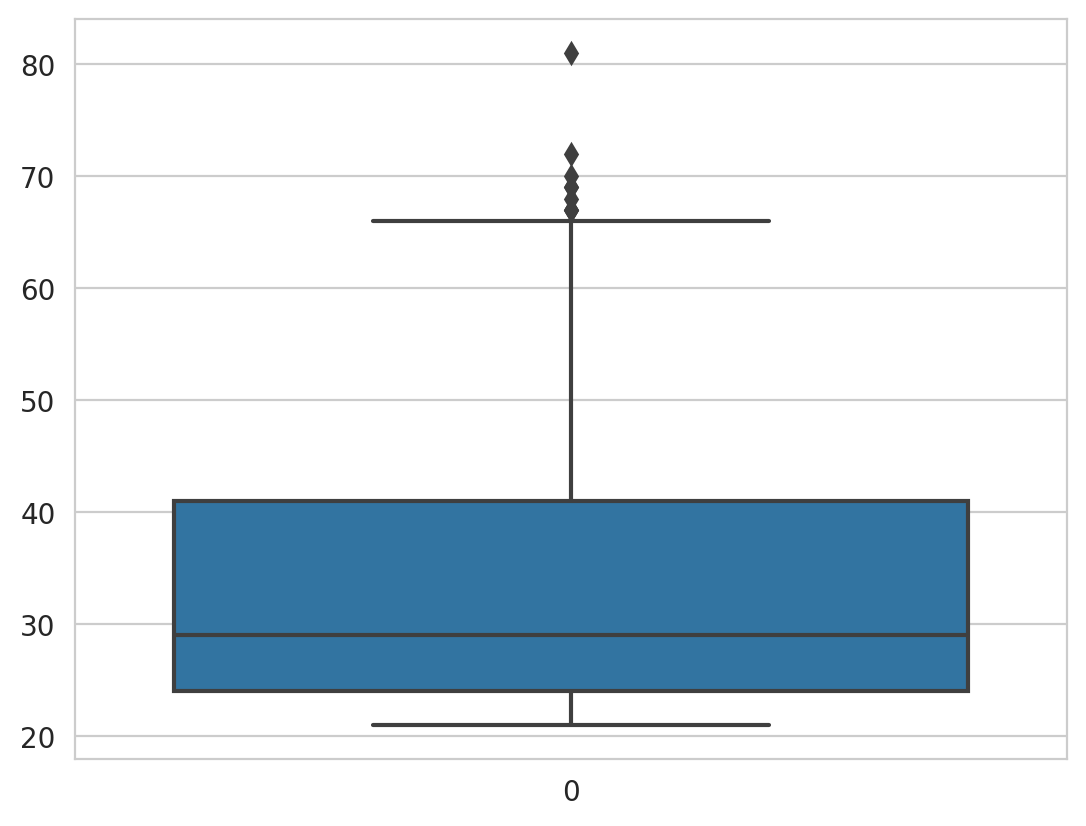

In [20]:
#sns.PairGrid(data = df.Age)

sns.boxplot(df.Age)

In [21]:
det_median('Age')

,Outcome,Age
0,0,27.0
1,1,36.0


In [22]:
df.loc[(df['Outcome']==0) & (df['BMI'] >52),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI']>52),'BMI'] =30.1

df.loc[(df['Outcome']==0) & (df['BloodPressure']>105),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']>105),'BloodPressure'] =74.5
df.loc[(df['Outcome']==0) & (df['Pregnancies']>12),'Pregnancies'] =2
df.loc[(df['Outcome']==1) & (df['Pregnancies']>12),'Pregnancies'] =4
df.loc[(df['Outcome']==0) & (df['Insulin']>250),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin']>250),'Insulin'] =169.5
df.loc[(df['Outcome']==0) & (df['SkinThickness']>40),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']>40),'SkinThickness'] =32.0
df.loc[(df['Outcome']==0) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.336
df.loc[(df['Outcome']==1) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.449

In [23]:
df.loc[(df['Outcome']==0) & (df['SkinThickness']<20),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']<20),'SkinThickness'] =32.0
df.loc[(df['Outcome']==0) & (df['BloodPressure']<40),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']<40),'BloodPressure'] =74.5

In [24]:
# Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],

splitting the dataset for testing and tranning

In [25]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor()
rforest.fit(X_train,y_train)
rforest.score(X_test,y_test)


0.7579300059654007